In [1]:
import pandas_datareader.data as pdr
import datetime as dt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
tickers = ['MSFT', 'AAPL','AMZN','GOOG','GOOGL','FB','JNJ','V','PG','JPM','UNH','MA','INTC','VZ','HD','T','PFE','MRK','PEP'] # Enter all the tickers whose data you require
stock_cp = pd.DataFrame()
start_date = dt.date.today() - dt.timedelta(365)  # Enter the Startdate in the form of datetime.date()
end_date = dt.date.today() # Enter the End Date in the form of datetime.date()
drop = []
while len(tickers) != 0:
    tickers = [j for j in tickers if j not in drop]
    for i in range(len(tickers)):
        temp = pdr.get_data_yahoo(tickers[i],start_date,end_date)
        temp.dropna(inplace = True)
        stock_cp[tickers[i]] = temp['Adj Close']
        drop.append(tickers[i])

In [3]:
stock_cp

,MSFT,AAPL,AMZN,GOOG,GOOGL,FB,JNJ,V,PG,JPM,UNH,MA,INTC,VZ,HD,T,PFE,MRK,PEP
Date,,,,,,,,,,,,,,,,,,,
2019-08-13,136.915222,206.917007,1824.339966,1197.270020,1196.729980,188.449997,129.783493,177.499710,114.328949,105.641266,244.979446,273.044373,45.784016,54.020737,203.169037,32.775654,33.839272,83.569199,126.300949
2019-08-14,132.792084,200.758102,1762.959961,1164.290039,1164.250000,179.710007,126.709618,172.431396,112.905327,101.254845,239.061874,265.704315,44.835884,53.397827,196.596008,32.051693,32.916386,80.967384,125.513580
2019-08-15,132.494751,199.758026,1776.119995,1167.260010,1169.319946,182.589996,126.981995,175.427017,114.465462,101.641304,240.093994,270.418701,44.669716,53.953655,196.791046,32.286747,33.147110,81.025620,127.068901
2019-08-16,134.923050,204.471252,1792.569946,1177.599976,1179.209961,183.699997,127.779648,177.377640,116.210869,104.076073,241.509521,272.875305,45.451683,54.289070,198.604965,32.879078,33.310535,82.578949,128.079849
2019-08-19,137.182831,208.283447,1816.119995,1198.449951,1200.439941,186.169998,128.645386,178.880417,117.244461,105.013260,240.546204,276.565216,46.165222,54.624485,202.798447,33.264565,33.820045,83.675987,128.867218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-06,216.350006,454.790009,3225.000000,1500.099976,1504.949951,265.279999,147.550003,198.770004,132.710007,97.239998,314.059998,330.140015,48.570000,57.830002,269.369995,29.840000,38.270000,81.050003,135.860001
2020-08-07,212.479996,444.450012,3167.459961,1494.489990,1498.369995,268.440002,148.600006,196.360001,133.550003,99.379997,317.029999,328.019989,48.029999,58.529999,271.640015,30.020000,38.450001,81.019997,136.740005
2020-08-10,208.250000,450.910004,3148.159912,1496.099976,1496.819946,263.000000,148.029999,196.789993,134.100006,100.639999,319.100006,322.880005,49.220001,58.990002,274.730011,30.200001,38.389999,80.910004,135.979996


In [4]:
BRK = pd.read_csv('BRK-B.csv', index_col='Date', parse_dates=True)

In [5]:
stock_cp['BRK'] = BRK['Adj Close']

In [6]:
stock_cp

,MSFT,AAPL,AMZN,GOOG,GOOGL,FB,JNJ,V,PG,JPM,UNH,MA,INTC,VZ,HD,T,PFE,MRK,PEP,BRK
Date,,,,,,,,,,,,,,,,,,,,
2019-08-13,136.915222,206.917007,1824.339966,1197.270020,1196.729980,188.449997,129.783493,177.499710,114.328949,105.641266,244.979446,273.044373,45.784016,54.020737,203.169037,32.775654,33.839272,83.569199,126.300949,198.779999
2019-08-14,132.792084,200.758102,1762.959961,1164.290039,1164.250000,179.710007,126.709618,172.431396,112.905327,101.254845,239.061874,265.704315,44.835884,53.397827,196.596008,32.051693,32.916386,80.967384,125.513580,195.809998
2019-08-15,132.494751,199.758026,1776.119995,1167.260010,1169.319946,182.589996,126.981995,175.427017,114.465462,101.641304,240.093994,270.418701,44.669716,53.953655,196.791046,32.286747,33.147110,81.025620,127.068901,198.309998
2019-08-16,134.923050,204.471252,1792.569946,1177.599976,1179.209961,183.699997,127.779648,177.377640,116.210869,104.076073,241.509521,272.875305,45.451683,54.289070,198.604965,32.879078,33.310535,82.578949,128.079849,199.720001
2019-08-19,137.182831,208.283447,1816.119995,1198.449951,1200.439941,186.169998,128.645386,178.880417,117.244461,105.013260,240.546204,276.565216,46.165222,54.624485,202.798447,33.264565,33.820045,83.675987,128.867218,200.940002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-06,216.350006,454.790009,3225.000000,1500.099976,1504.949951,265.279999,147.550003,198.770004,132.710007,97.239998,314.059998,330.140015,48.570000,57.830002,269.369995,29.840000,38.270000,81.050003,135.860001,205.020004
2020-08-07,212.479996,444.450012,3167.459961,1494.489990,1498.369995,268.440002,148.600006,196.360001,133.550003,99.379997,317.029999,328.019989,48.029999,58.529999,271.640015,30.020000,38.450001,81.019997,136.740005,209.479996
2020-08-10,208.250000,450.910004,3148.159912,1496.099976,1496.819946,263.000000,148.029999,196.789993,134.100006,100.639999,319.100006,322.880005,49.220001,58.990002,274.730011,30.200001,38.389999,80.910004,135.979996,212.580002


In [7]:
corr = stock_cp.pct_change(1).corr()

In [8]:
corr

,MSFT,AAPL,AMZN,GOOG,GOOGL,FB,JNJ,V,PG,JPM,UNH,MA,INTC,VZ,HD,T,PFE,MRK,PEP,BRK
MSFT,1.000000,0.861019,0.721187,0.869032,0.875290,0.776515,0.680933,0.819773,0.676970,0.669364,0.694773,0.789811,0.773263,0.649179,0.772755,0.655466,0.624449,0.692732,0.753109,0.760143
AAPL,0.861019,1.000000,0.663617,0.806383,0.805592,0.795486,0.632193,0.770296,0.643742,0.659424,0.686051,0.759460,0.713934,0.618706,0.736490,0.677059,0.576513,0.620457,0.706664,0.755528
AMZN,0.721187,0.663617,1.000000,0.687438,0.683617,0.650251,0.459461,0.489056,0.469798,0.385877,0.466060,0.483507,0.565172,0.454648,0.493488,0.423634,0.427687,0.441056,0.498774,0.475508
GOOG,0.869032,0.806383,0.687438,1.000000,0.997765,0.804094,0.627913,0.816985,0.611711,0.685097,0.669993,0.784445,0.711492,0.612996,0.741857,0.670400,0.600569,0.621520,0.659226,0.742870
GOOGL,0.875290,0.805592,0.683617,0.997765,1.000000,0.801130,0.631169,0.821817,0.613100,0.683375,0.676784,0.788187,0.721770,0.619445,0.749075,0.673649,0.604867,0.628009,0.669725,0.744602
FB,0.776515,0.795486,0.650251,0.804094,0.801130,1.000000,0.522677,0.708283,0.474228,0.596544,0.609135,0.683924,0.619224,0.485860,0.650210,0.531869,0.479953,0.551862,0.557135,0.643616
JNJ,0.680933,0.632193,0.459461,0.627913,0.631169,0.522677,1.000000,0.642719,0.752593,0.567918,0.676524,0.611950,0.571644,0.693849,0.569707,0.666437,0.725532,0.709603,0.726231,0.670803
V,0.819773,0.770296,0.489056,0.816985,0.821817,0.708283,0.642719,1.000000,0.623019,0.779549,0.718284,0.945999,0.660455,0.611414,0.767957,0.699197,0.593791,0.673926,0.694539,0.822773
PG,0.676970,0.643742,0.469798,0.611711,0.613100,0.474228,0.752593,0.623019,1.000000,0.566290,0.557306,0.604496,0.582092,0.742791,0.601057,0.709367,0.673661,0.625948,0.832310,0.679718
JPM,0.669364,0.659424,0.385877,0.685097,0.683375,0.596544,0.567918,0.779549,0.566290,1.000000,0.667883,0.755907,0.628384,0.605688,0.741360,0.779611,0.588216,0.591409,0.649047,0.880503


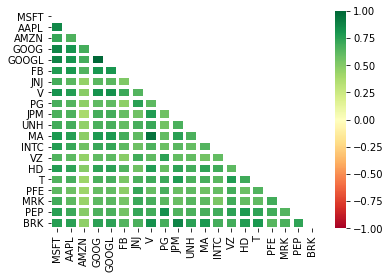

In [9]:
 #take the bottom triangle since it repeats itself
 mask = np.zeros_like(corr)
 mask[np.triu_indices_from(mask)] = True
 #generate plot
 sns.heatmap(corr, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 plt.yticks(rotation=0) 
 plt.xticks(rotation=90) 
 plt.show()

In [40]:
sum_corr = stock_cp.corr().sum().sort_values(ascending=True).index.values

In [11]:
sum_corr

array(['T', 'AMZN', 'BRK', 'JPM', 'MRK', 'VZ', 'INTC', 'MSFT', 'AAPL',
       'PFE', 'HD', 'JNJ', 'PG', 'UNH', 'PEP', 'FB', 'V', 'GOOG', 'GOOGL',
       'MA'], dtype=object)

In [12]:
selected_stocks = stock_cp[sum_corr[:5]]

In [13]:
selected_stocks

,T,AMZN,BRK,JPM,MRK
Date,,,,,
2019-08-13,32.775654,1824.339966,198.779999,105.641266,83.569199
2019-08-14,32.051693,1762.959961,195.809998,101.254845,80.967384
2019-08-15,32.286747,1776.119995,198.309998,101.641304,81.025620
2019-08-16,32.879078,1792.569946,199.720001,104.076073,82.578949
2019-08-19,33.264565,1816.119995,200.940002,105.013260,83.675987
...,...,...,...,...,...
2020-08-06,29.840000,3225.000000,205.020004,97.239998,81.050003
2020-08-07,30.020000,3167.459961,209.479996,99.379997,81.019997
2020-08-10,30.200001,3148.159912,212.580002,100.639999,80.910004


In [14]:
log_ret = np.log(selected_stocks/selected_stocks.shift(1))
log_ret.head()

,T,AMZN,BRK,JPM,MRK
Date,,,,,
2019-08-13,NaN,NaN,NaN,NaN,NaN
2019-08-14,-0.022336,-0.034224,-0.015054,-0.042409,-0.031629
2019-08-15,0.007307,0.007437,0.012687,0.003809,0.000719
2019-08-16,0.018180,0.009219,0.007085,0.023672,0.018989
2019-08-19,0.011656,0.013052,0.006090,0.008965,0.013197


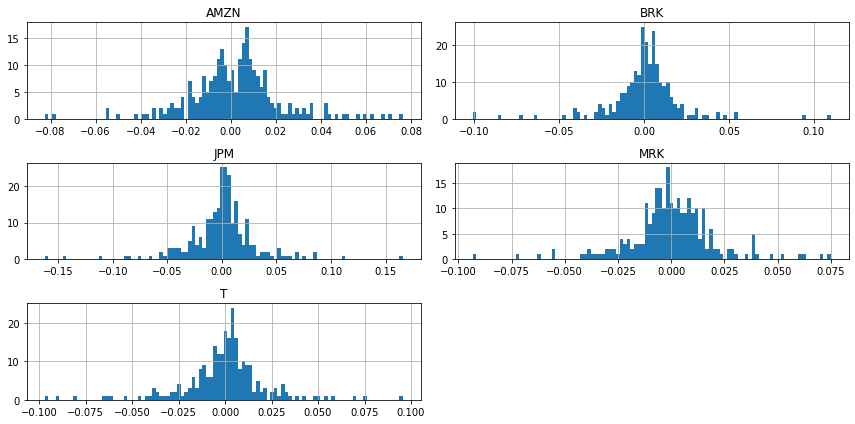

In [15]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [16]:
log_ret.mean() * 252

T      -0.083004
AMZN    0.545819
BRK     0.067765
JPM    -0.026972
MRK    -0.012877
dtype: float64

In [17]:
log_ret.cov()*252

,T,AMZN,BRK,JPM,MRK
T,0.124662,0.050621,0.094826,0.140689,0.069707
AMZN,0.050621,0.112874,0.054892,0.067680,0.047778
BRK,0.094826,0.054892,0.114723,0.153438,0.073009
JPM,0.140689,0.067680,0.153438,0.263492,0.098636
MRK,0.069707,0.047778,0.073009,0.098636,0.102635


In [18]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(selected_stocks.columns)
print('\n')

# Rebalance Weights
weights = np.array(np.random.random(5))
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['T', 'AMZN', 'BRK', 'JPM', 'MRK'], dtype='object')


[0.26182041 0.28933544 0.01443678 0.08696357 0.3474438 ]


Expected Portfolio Return
0.13035155078952784


Expected Volatility
0.28359321664638903


Sharpe Ratio
0.45964269643325967


In [19]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(selected_stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(5))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [20]:
sharpe_arr.max()

1.3864271420528047

In [21]:
sharpe_arr.argmax()

10532

In [22]:
all_weights[10532,:]

array([0.08152537, 0.77753138, 0.0579347 , 0.02818283, 0.05482572])

In [23]:
max_sr_ret = ret_arr[10532]
max_sr_vol = vol_arr[10532]

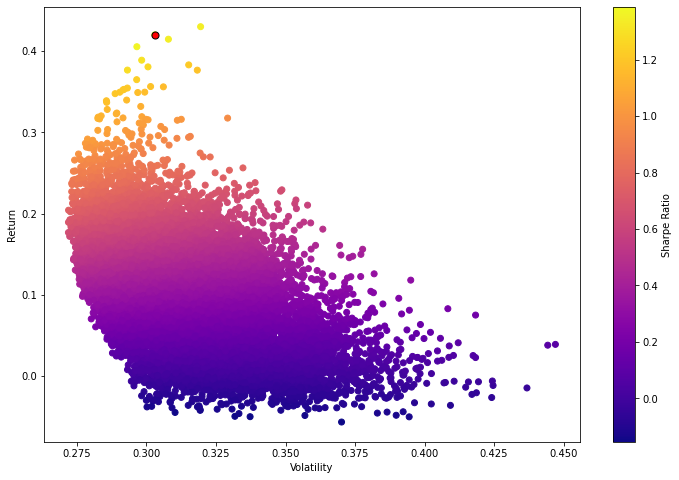

In [24]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

In [25]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [26]:
from scipy.optimize import minimize

In [27]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [28]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [29]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [30]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [31]:
# Initial Guess (equal distribution)
init_guess = [0.20,0.20,0.20,0.20, 0.20]

In [32]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [33]:
opt_results

     fun: -1.6246181567785798
     jac: array([9.75662306e-01, 2.98023224e-08, 5.88368014e-01, 1.05440924e+00,
       7.26000592e-01])
 message: 'Optimization terminated successfully.'
    nfev: 14
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([8.32667268e-17, 1.00000000e+00, 1.66533454e-16, 2.77555756e-17,
       1.11022302e-16])

In [34]:
opt_results.x

array([8.32667268e-17, 1.00000000e+00, 1.66533454e-16, 2.77555756e-17,
       1.11022302e-16])

In [35]:
get_ret_vol_sr(opt_results.x)

array([0.54581908, 0.33596761, 1.62461816])

In [36]:
frontier_y = np.linspace(-0.025,0.5,100)

In [37]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [38]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

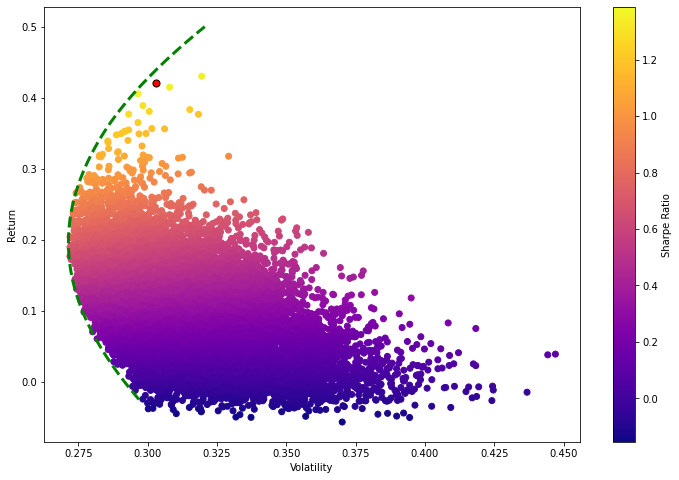

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)